In [1]:
from strat_meta.GME import Individual
import pickle
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
import os

creator.create("FitnessMulti", base.Fitness, weights=(-1,))
creator.create("Individual", Individual, fitness=creator.FitnessMulti)

/home/rami/anaconda3/envs/ml/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/rami/anaconda3/envs/ml/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [2]:
def res_to_metrics(m_name, prefix=''):
    import pickle
    import numpy as np
    from deap import algorithms
    from deap import base
    from deap import creator
    from deap import tools
    import os
    
    from strat_meta.GME import Individual

    creator.create("FitnessMulti", base.Fitness, weights=(-1,))
    creator.create("Individual", Individual, fitness=creator.FitnessMulti)

    with open(os.path.join(prefix, f'results/{m_name}_dict.pkl'), 'rb') as file:
        rfr_dict = pickle.load(file)
        
    hours = list(range(0, 24))
    hours_labels = list(map(str, hours))
    distances = []

    for keys in rfr_dict.keys():
        if keys[0] == 1:
            break
        distances.append( keys[1] )#'-'.join( map(str, (map(int, keys[1]))) ) )
        
    dist_labels = []

    for keys in rfr_dict.keys():
        if keys[0] == 1:
            break
        m_to_km = lambda x: int(x/ 1000)
        dist_labels.append( '-'.join( map(str, (map(m_to_km, keys[1] ))) ) )
        
    MAPE_vals = np.zeros(shape=(len(distances), len(hours)))
    MAE_vals = np.zeros(shape=(len(distances), len(hours)))
    pred_time_vals = np.zeros(shape=(len(distances), len(hours)))
    ffunc_vals = np.zeros(shape=(len(distances), len(hours)))

    for hour in hours:
        for dist_idx, dist in enumerate(distances):
            MAPE_vals[dist_idx, hour] = round(rfr_dict[ (hour, dist) ].method.history['MAPE'][rfr_dict[ (hour, dist) ].best_exp], 2)
            MAE_vals[dist_idx, hour] = int(rfr_dict[ (hour, dist) ].method.history['MAE'][rfr_dict[ (hour, dist) ].best_exp])
            pred_time_vals[dist_idx, hour] = rfr_dict[ (hour, dist) ].method.history['pred_time'][rfr_dict[ (hour, dist) ].best_exp]
            ffunc_vals[dist_idx, hour] = rfr_dict[ (hour, dist) ].best
            
    with open(os.path.join(prefix, f'metrics/{m_name}_mape.pkl'), 'wb') as f:
        pickle.dump(MAPE_vals, f)
    
    with open(os.path.join(prefix, f'metrics/{m_name}_mae.pkl'), 'wb') as f:
        pickle.dump(MAE_vals, f)

    with open(os.path.join(prefix, f'metrics/{m_name}_pred_time.pkl'), 'wb') as f:
        pickle.dump(pred_time_vals, f)

    with open(os.path.join(prefix, f'metrics/{m_name}_ffunc.pkl'), 'wb') as f:
        pickle.dump(ffunc_vals, f)

In [4]:
metrcis_dict = {'mape': dict(), 'mae': dict(), 'pred_time': dict(), 'ffunc': dict()}

for fname in os.listdir('metrics'):
    name, _ = fname.split('.')
    method, metric = name.split('_')[0], '_'.join(name.split('_')[1:])
    
    with open('metrics/' + fname, 'rb') as f:
        res = pickle.load(f)
    
    metrcis_dict[metric][method] = res

In [6]:
from strat_meta.GME import GeneticMetaEstimator, Method, MetaParameters, Metric

In [6]:
import numpy as np
best_ffunc = np.zeros(shape=(7, 24))
best_mape = np.zeros(shape=(7, 24))
best_mape_m = np.zeros(shape=(7, 24))
best_pred_time = np.zeros(shape=(7, 24))
for i in range(7):
    for j in range(24):
        rfr = metrcis_dict['ffunc']['rfr'][i, j]
        gbr = metrcis_dict['ffunc']['gbr'][i, j]
        svr = metrcis_dict['ffunc']['svr'][i, j]
        best_ffunc[i, j] = min([rfr, gbr, svr])
        
        if best_ffunc[i, j] == rfr:
            best_mape[i, j] = metrcis_dict['mape']['rfr'][i, j]
            best_pred_time[i, j] = metrcis_dict['pred_time']['rfr'][i, j]
            best_mape_m[i, j] = 0
        elif best_ffunc[i, j] == gbr:
            best_mape[i, j] = metrcis_dict['mape']['gbr'][i, j]
            best_pred_time[i, j] = metrcis_dict['pred_time']['gbr'][i, j]
            best_mape_m[i, j] = 1
        elif best_ffunc[i, j] == svr:
            best_mape[i, j] = metrcis_dict['mape']['svr'][i, j]
            best_pred_time[i, j] = metrcis_dict['pred_time']['svr'][i, j]

            best_mape_m[i, j] = 2

In [8]:
import pickle
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

from strat_meta.GME import Individual

creator.create("FitnessMulti", base.Fitness, weights=(-1,))
creator.create("Individual", Individual, fitness=creator.FitnessMulti)

with open('results/gbr_dict.pkl', 'rb') as file:
    gbr_dict = pickle.load(file)
    
hours = list(range(0, 24))
hours_labels = list(map(str, hours))
distances = []

for keys in gbr_dict.keys():
    if keys[0] == 1:
        break
    
dist_labels = []

for keys in gbr_dict.keys():
    if keys[0] == 1:
        break
    m_to_km = lambda x: int(x/ 1000)
    dist_labels.append( '-'.join( map(str, (map(m_to_km, keys[1] ))) ) )

/home/rami/anaconda3/envs/ml/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/rami/anaconda3/envs/ml/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [9]:
best_mape.mean()

36.00988095238095

# Meta Clustering

In [189]:
best_methods_params = []

for i, d in enumerate(distances):
    row = []
    for j, h in enumerate(hours):
        best_method = int(best_ffunc[i, j])
        
        key = list(methods[best_method].keys())[i * 24  + j]
        
        m_descr = dict()
        
        m_descr['params'] = methods[best_method][key].params_dict
        best_exp = methods[best_method][key].best_exp
                
        m_descr['mape'] = methods[best_method][key].method.history['MAPE'][best_exp]
        m_descr['mae'] = methods[best_method][key].method.history['MAE'][best_exp]
        m_descr['pred_time'] = methods[best_method][key].method.history['pred_time'][best_exp]
        m_descr['ffunc'] = methods[best_method][key].best
        
        row.append(m_descr)
    best_methods_params.append(row)

best_methods_params = np.array(best_methods_params)

In [191]:
for i, d in enumerate(distances):
    for j, h in enumerate(hours):
        print(f'{(h, d)} Params: {best_methods_params[i, j]}, MAPE: {best_mape[i, j]}, ffunc: {best_ffunc[i, j]:.3f}')

(0, (501.0, 2032.0)) Params: {'params': {'n_estimators': 24, 'criterion': 'mae', 'min_samples_split': 0.5766073543841929, 'max_features': 'auto'}, 'mape': 35.51572674199087, 'mae': 516.2996495327102, 'pred_time': 0.0015189647674560547, 'ffunc': 0.32810104583347804}, MAPE: 38.39, ffunc: 0.262
(1, (501.0, 2032.0)) Params: {'params': {'n_estimators': 64, 'criterion': 'mae', 'min_samples_split': 0.4029991553095697, 'max_features': 'auto'}, 'mape': 31.705517035419646, 'mae': 399.3309210526316, 'pred_time': 0.0035483837127685547, 'ffunc': 0.3575060447636439}, MAPE: 39.93, ffunc: 0.249
(2, (501.0, 2032.0)) Params: {'params': {'n_estimators': 10, 'criterion': 'mae', 'min_samples_split': 1.0, 'max_features': 'sqrt'}, 'mape': 64.55272998670016, 'mae': 572.2461904761906, 'pred_time': 0.0007979869842529297, 'ffunc': 0.4241832948844163}, MAPE: 34.41, ffunc: 0.202
(3, (501.0, 2032.0)) Params: {'params': {'n_estimators': 24, 'criterion': 'mae', 'min_samples_split': 0.3788408856895986, 'max_features':

In [387]:
cluster_data = np.zeros(shape=(168, 2))

for i, d in enumerate(distances):
    for j, h in enumerate(hours):
        cluster_data[i*24 + j] = (best_methods_params[i, j]['ffunc'], best_methods_params[i, j]['pred_time'])#, i, j]
        

ranges['ffunc'] = ( np.min(cluster_data, axis=0)[0], np.max(cluster_data, axis=0)[0] )
ranges['pred_time'] = ( np.min(cluster_data, axis=0)[1], np.max(cluster_data, axis=0)[1] )

ffunc_range = ranges['ffunc']
norm_ff = lambda x: minmax(x, ffunc_range)
pt_range = ranges['pred_time']
norm_pt = lambda x: minmax(x, pt_range)

for i, d in enumerate(distances):
    for j, h in enumerate(hours):
        ff, pt = cluster_data[i*24 + j]
        cluster_data[i*24 + j] = (norm_ff(ff), norm_pt(pt))#, i, j]

In [193]:
def minmax(val, _range):
    
    min_, max_ = _range

    return (val - min_) / (max_ - min_)

ranges = dict()
ranges['ffunc'] = ( np.min(cluster_data, axis=0)[0], np.max(cluster_data, axis=0)[0] )
ranges['pred_time'] = ( np.min(cluster_data, axis=0)[1], np.max(cluster_data, axis=0)[1] )

1.301723832865823 0.0


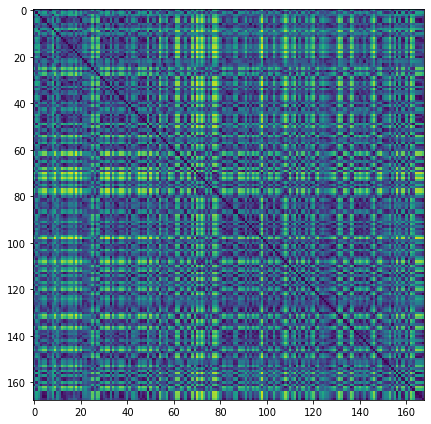

In [389]:
from sklearn.metrics import pairwise_distances

pwd = pairwise_distances(cluster_data)
print(np.max(pwd), np.min(pwd))
plt.imshow(pwd)

In [406]:
from sklearn.cluster import DBSCAN

clus = DBSCAN(eps=0.07, min_samples=3)#, metric=clust_dist)

clus.fit(cluster_data)

DBSCAN(eps=0.07, min_samples=3)

In [198]:
clustered_methods = np.hstack([cluster_data, np.expand_dims(clus.labels_, axis=1)])
keys_to_class = dict()

for i, d in enumerate(distances):
    for j, h in enumerate(hours):
        keys_to_class[(h, d)] = clus.labels_[i * 24  + j]

In [213]:
class_descr = dict()
for cls_ in np.unique( clus.labels_ ):
    groups = clustered_methods[:, 4] == cls_
    gr_ffunc = best_ffunc.flatten()[groups]
    best_ffunc_idx = np.argmin(gr_ffunc)
    gr_ffunc = best_ffunc.flatten()[best_ffunc_idx]
    gr_methods = best_mape_m.flatten()[best_ffunc_idx]
    gr_mape = best_mape.flatten()[best_ffunc_idx]
    gr_params = best_methods_params.flatten()[best_ffunc_idx]
    
    class_descr[cls_] = {'cls_method': int(gr_methods),
                         'cls_ffunc': gr_ffunc,
                         'cls_mape': gr_mape,
                         'cls_params': gr_params}

In [201]:
mape_ = []
for cls_, descr in class_descr.items():
    mape_.append(descr['cls_mape'])

In [170]:
import numpy as np
import os
from strat_meta.loader import Dataset
import random

random.seed(42)

loader = Dataset('data', None, None, None)
dataset = loader.load('train_dataset.csv')

In [203]:
dataset.df['cls_label'] = [-1]*len(dataset)
cls_labels = []

for row in dataset.itertuples():
    h = row.hour
    for dist_range in distances:
        if row.dist > dist_range[0] and row.dist <= dist_range[1]:
            break
        
    cls_labels.append(keys_to_class[(h, dist_range)])
    
dataset['cls_label'] = cls_labels

In [204]:
from sklearn.model_selection import train_test_split
Y = dataset.pop('duration')
X_train, X_test, y_train, y_test = train_test_split(dataset, Y, test_size=0.2, shuffle=False)

In [3]:
from sklearn.ensemble import RandomForestRegressor as RFR, GradientBoostingRegressor as GBR
from sklearn.svm import SVR
from tqdm.notebook import tqdm

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import mean_absolute_error as mae

cls_to_method = {0: RFR,
                 1: GBR,
                 2: SVR}

In [221]:
cls_to_metric = {}
from datetime import datetime

for cls_ in np.unique(clus.labels_):
    print(f'{datetime.now().isoformat()} cls: {cls_}, method: {class_descr[cls_]["cls_method"]}, cls_mape: {class_descr[cls_]["cls_mape"]}')
    cls_x_train = X_train.loc[X_train['cls_label'] == cls_]
    cls_x_train.pop('cls_label')
    cls_y_train = y_train.loc[cls_x_train.index].to_numpy()
    cls_y_train = np.ravel(cls_y_train)
    
    cls_x_test = X_test.loc[X_test['cls_label'] == cls_]
    cls_x_test.pop('cls_label')
    cls_y_test = y_test.loc[cls_x_test.index].to_numpy()
    cls_y_test = np.ravel(cls_y_test)
    
    cls_d = class_descr[cls_]
    
    method = cls_to_method[cls_d['cls_method']]
    
    M = method( **cls_d['cls_params']['params'] )
    
    M.fit(cls_x_train, cls_y_train)
    pred = M.predict(cls_x_test)
    
    cls_to_metric[cls_] = {'predictior': M, 'mape': mape(cls_y_test, pred), 'mae': mae(cls_y_test, pred)}
    print('Done')

cls_to_metric

2022-02-02T16:03:37.605579 cls: -1, method: 1, cls_mape: 48.04
Done
2022-02-02T16:03:37.847070 cls: 0, method: 0, cls_mape: 33.62
Done
2022-02-02T16:25:56.188427 cls: 1, method: 1, cls_mape: 38.39
Done
2022-02-02T16:26:08.811888 cls: 2, method: 1, cls_mape: 38.39
Done
2022-02-02T16:26:09.006797 cls: 3, method: 1, cls_mape: 42.84
Done
2022-02-02T16:26:10.332940 cls: 4, method: 1, cls_mape: 57.54
Done
2022-02-02T16:26:11.013385 cls: 5, method: 1, cls_mape: 38.39
Done
2022-02-02T16:26:13.437700 cls: 6, method: 1, cls_mape: 34.41
Done
2022-02-02T16:26:14.469871 cls: 7, method: 1, cls_mape: 38.39
Done


{-1: {'predictior': GradientBoostingRegressor(criterion='mse', max_features='auto',
                            min_samples_split=0.2988975428569578,
                            n_estimators=11),
  'mape': 42.56155192255264,
  'mae': 557.9800110253423},
 0: {'predictior': RandomForestRegressor(criterion='mae', max_features='sqrt',
                        min_samples_split=0.2562906831510937, n_estimators=55),
  'mape': 35.3374669445602,
  'mae': 536.7683107809802},
 1: {'predictior': GradientBoostingRegressor(criterion='mae', max_features='auto',
                            min_samples_split=0.5766073543841929,
                            n_estimators=24),
  'mape': 37.70111817041571,
  'mae': 523.6670830784201},
 2: {'predictior': GradientBoostingRegressor(criterion='mae', max_features='auto',
                            min_samples_split=0.5766073543841929,
                            n_estimators=24),
  'mape': 31.03843405750833,
  'mae': 372.30499137316934},
 3: {'predictior': Grad

In [49]:
cls_mape = np.zeros(shape=(7, 24))

for i, h in enumerate(hours):
    data_hour = X_test.loc[X_test.start_hour == h]
    for j, drange in enumerate(distances):
        data = data_hour.loc[data_hour.distance > drange[0]]
        data = data.loc[data.distance < drange[1]]
        pred_cls = np.unique(data.cls_label)[0]
        data.pop('cls_label')
        
        M = cls_to_metric[pred_cls]['predictior']
        pred = M.predict(data)
        y = y_test.loc[data.index]
        cls_mape[j, i] = mape(y, pred)

In [52]:
cls_mape.mean()

38.528308714564695